In [ ]:
pip install pyarrow
pip install fastparquet
pip install yfinance

#### Salvar tick no computador.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:,.0f}'.format


#### Código do professor, necessita digitar o ticker do yahoo finance e indicar pasta para salvamento.

In [4]:
import yfinance as yf
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import os

def download_historical_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados para {ticker}: {e}")
        return None

if __name__ == "__main__":
    ticker_symbols = []
    print("Digite os códigos das ações, um por linha. Digite 'fim' (sem aspas) em uma linha separada para encerrar a lista.")
    ticker_symbol = input().strip()

    while ticker_symbol.lower() != "fim":
        ticker_symbols.append(ticker_symbol)
        ticker_symbol = input().strip()

    start_date = "1800-01-01"
    end_date = "2050-01-01"

    failed_downloads = []

    # Diretório de saída fixo
    output_directory = 'C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning'

    for ticker_symbol in ticker_symbols:
        historical_data = download_historical_data(ticker_symbol, start_date, end_date)

        if historical_data is not None and not historical_data.empty:
            historical_data.reset_index(inplace=True)
            historical_data['Date'] = historical_data['Date'].dt.strftime('%m/%d/%Y')

            folder_path = os.path.join(output_directory, ticker_symbol)

            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            output_file = os.path.join(folder_path, f"{ticker_symbol}_serie_historica.xlsx")
            workbook = Workbook()
            worksheet = workbook.active

            for row in dataframe_to_rows(historical_data, index=False, header=True):
                worksheet.append(row)

            for cell in worksheet['A'][1:]:
                cell.number_format = 'mm/dd/yyyy'

            workbook.save(output_file)

            print("Dados salvos com sucesso em:", output_file)
        else:
            failed_downloads.append(ticker_symbol)

    if failed_downloads:
        print("As seguintes ações não puderam ser encontradas ou estão deslistadas no Yahoo Finance:")
        for ticker_symbol in failed_downloads:
            print(ticker_symbol)

    print("fim")


Digite os códigos das ações, um por linha. Digite 'fim' (sem aspas) em uma linha separada para encerrar a lista.


[*********************100%***********************]  1 of 1 completed


Dados salvos com sucesso em: C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning\abev\abev_serie_historica.xlsx
fim


In [6]:
import yfinance as yf
import pandas as pd

def download_historical_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados para {ticker}: {e}")
        return None

if __name__ == "__main__":
    ticker_symbols = []
    print("Digite os códigos das ações, um por linha. Digite 'fim' (sem aspas) em uma linha separada para encerrar a lista.")
    ticker_symbol = input().strip()

    while ticker_symbol.lower() != "fim":
        ticker_symbols.append(ticker_symbol)
        ticker_symbol = input().strip()

    start_date = "1800-01-01"
    end_date = "2050-01-01"

    failed_downloads = []
    all_data = pd.DataFrame()

    for ticker_symbol in ticker_symbols:
        historical_data = download_historical_data(ticker_symbol, start_date, end_date)

        if historical_data is not None and not historical_data.empty:
            historical_data.reset_index(inplace=True)
            historical_data['Ticker'] = ticker_symbol  # Adicionar uma coluna para identificar o ticker no DataFrame
            all_data = pd.concat([all_data, historical_data])  # Concatenar os dados no DataFrame final
        else:
            failed_downloads.append(ticker_symbol)

    # Exibir o DataFrame final com todos os tickers
    print(all_data)

    if failed_downloads:
        print("As seguintes ações não puderam ser encontradas ou estão deslistadas no Yahoo Finance:")
        for ticker_symbol in failed_downloads:
            print(ticker_symbol)

    print("fim")


Digite os códigos das ações, um por linha. Digite 'fim' (sem aspas) em uma linha separada para encerrar a lista.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AATA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


           Date    Open    High     Low   Close  Adj Close    Volume Ticker
0    1997-03-05  0.0000  0.4500  0.4500  0.4500   0.198069     15000   abev
1    1997-03-06  0.4500  0.4500  0.4500  0.4500   0.198069         0   abev
2    1997-03-07  0.4500  0.4500  0.4500  0.4500   0.198069         0   abev
3    1997-03-10  0.0000  0.4875  0.4875  0.4875   0.214575     24000   abev
4    1997-03-11  0.4875  0.4875  0.4875  0.4875   0.214575         0   abev
...         ...     ...     ...     ...     ...        ...       ...    ...
6933 2024-09-23  2.3100  2.3200  2.2900  2.3100   2.310000  14551500   abev
6934 2024-09-24  2.3600  2.3700  2.3200  2.3300   2.330000  28081200   abev
6935 2024-09-25  2.3600  2.3800  2.3100  2.3300   2.330000  28728100   abev
6936 2024-09-26  2.3600  2.3700  2.3500  2.3600   2.360000  10628600   abev
6937 2024-09-27  2.3600  2.4100  2.3600  2.4000   2.400000  58602700   abev

[6938 rows x 8 columns]
As seguintes ações não puderam ser encontradas ou estão deslist

##### Aqui não salva no computador, para trabalhar somente em python.

In [19]:
import yfinance as yf
import pandas as pd

def download_historical_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            print(f"Nenhum dado encontrado para {ticker}.")
            return None
        return data
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados para {ticker}: {e}")
        return None

if __name__ == "__main__":
    ticker_symbols = []
    print("Digite os códigos das ações, um por linha. Digite 'fim' (sem aspas) em uma linha separada para encerrar a lista.")
    ticker_symbol = input().strip()

    while ticker_symbol.lower() != "fim":
        ticker_symbols.append(ticker_symbol)
        ticker_symbol = input().strip()

    start_date = "1800-01-01"
    end_date = "2050-01-01"

    failed_downloads = []
    all_data = pd.DataFrame()

    for ticker_symbol in ticker_symbols:
        print(f"Baixando dados para: {ticker_symbol}")
        historical_data = download_historical_data(ticker_symbol, start_date, end_date)

        if historical_data is not None:
            historical_data.reset_index(inplace=True)
            historical_data['Ticker'] = ticker_symbol  # Adicionar uma coluna para identificar o ticker no DataFrame
            all_data = pd.concat([all_data, historical_data])  # Concatenar os dados no DataFrame final
        else:
            failed_downloads.append(ticker_symbol)

    # Exibir o DataFrame final com todos os tickers
    print("Dados baixados:")
    print(all_data)

    if failed_downloads:
        print("\nAs seguintes ações não puderam ser encontradas ou estão deslistadas no Yahoo Finance:")
        for ticker_symbol in failed_downloads:
            print(ticker_symbol)

    print("Fim")


Digite os códigos das ações, um por linha. Digite 'fim' (sem aspas) em uma linha separada para encerrar a lista.
Baixando dados para: SANB11.SA


[*********************100%***********************]  1 of 1 completed

Baixando dados para: abev



[*********************100%***********************]  1 of 1 completed

Dados baixados:
           Date       Open       High        Low      Close  Adj Close  \
0    2009-10-07  22.561249  22.695656  21.716402  21.716402   9.030400   
1    2009-10-08  21.793205  22.234831  21.121168  21.745203   9.042378   
2    2009-10-09  21.726002  22.081223  21.668400  21.956415   9.130212   
3    2009-10-13  21.889212  22.033218  21.495588  21.879610   9.098270   
4    2009-10-14  21.975616  22.071621  21.658798  21.735603   9.038388   
...         ...        ...        ...        ...        ...        ...   
6933 2024-09-23   2.310000   2.320000   2.290000   2.310000   2.310000   
6934 2024-09-24   2.360000   2.370000   2.320000   2.330000   2.330000   
6935 2024-09-25   2.360000   2.380000   2.310000   2.330000   2.330000   
6936 2024-09-26   2.360000   2.370000   2.350000   2.360000   2.360000   
6937 2024-09-27   2.360000   2.410000   2.360000   2.400000   2.400000   

        Volume     Ticker  
0     87207046  SANB11.SA  
1     30902039  SANB11.SA  
2      6485

#### Lista B3 coletada na internet.

In [3]:
ListaB3 = pd.read_excel('C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Yahoo Ticker Symbols.xlsx', sheet_name= "Stock")
ListaB3 = ListaB3.iloc[2:]
ListaB3.head()

,Yahoo Stock Tickers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
2,Ticker,Name,Exchange,Category Name,Country,NaN,NaN,NaN
3,OEDV,"Osage Exploration and Development, Inc.",PNK,NaN,USA,NaN,NaN,Samir Khan
4,AAPL,Apple Inc.,NMS,Electronic Equipment,USA,NaN,NaN,simulationconsultant@gmail.com
5,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA,NaN,NaN,NaN
6,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA,NaN,NaN,This ticker symbol list was downloaded from


In [82]:
ListaB3 = ListaB3.reset_index(drop=True)
ListaB3.columns = ListaB3.iloc[0]  
ListaB3 = ListaB3.drop(index=0).reset_index(drop=True)
ListaB3 = ListaB3[['Ticker', 'Name', 'Exchange', 'Category Name', 'Country']]
ListaB3.head()

,Ticker,Name,Exchange,Category Name,Country
0,OEDV,"Osage Exploration and Development, Inc.",PNK,NaN,USA
1,AAPL,Apple Inc.,NMS,Electronic Equipment,USA
2,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA
3,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA
4,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA


In [83]:
ListaB3 = ListaB3[ListaB3['Country'] == 'Brazil'].reset_index(drop=True)
ListaB3.head()


,Ticker,Name,Exchange,Category Name,Country
0,LAME4.SA,Lojas Americanas S.A.,SAO,Department Stores,Brazil
1,ABEV3.SA,Ambev S.A.,SAO,Beverages - Brewers,Brazil
2,VALE5.SA,Vale S.A.,SAO,Industrial Metals & Minerals,Brazil
3,SBSP3.SA,Companhia de Saneamento BÃ¡sico do Estado de S...,SAO,Water Utilities,Brazil
4,VALE3.SA,Vale S.A.,SAO,Industrial Metals & Minerals,Brazil


In [84]:
ListaB3.to_excel("C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/ListaB3.xlsx", index=False)

#### Definir a lista somente os 5 primeiros, para ir testando e fazendo sem pesar muito, depois faço todo o processo com a lista completa.

In [2]:
ListaB3 = pd.read_excel('C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/ListaB3.xlsx', sheet_name= "Sheet1")
ListaB3.head()

,Ticker,Name,Exchange,Category Name,Country
0,LAME4.SA,Lojas Americanas S.A.,SAO,Department Stores,Brazil
1,ABEV3.SA,Ambev S.A.,SAO,Beverages - Brewers,Brazil
2,VALE5.SA,Vale S.A.,SAO,Industrial Metals & Minerals,Brazil
3,SBSP3.SA,Companhia de Saneamento BÃ¡sico do Estado de S...,SAO,Water Utilities,Brazil
4,VALE3.SA,Vale S.A.,SAO,Industrial Metals & Minerals,Brazil


In [85]:
ListaB3_5 = ListaB3.iloc[:5,:]
ListaB3_5.head(10)

,Ticker,Name,Exchange,Category Name,Country
0,LAME4.SA,Lojas Americanas S.A.,SAO,Department Stores,Brazil
1,ABEV3.SA,Ambev S.A.,SAO,Beverages - Brewers,Brazil
2,VALE5.SA,Vale S.A.,SAO,Industrial Metals & Minerals,Brazil
3,SBSP3.SA,Companhia de Saneamento BÃ¡sico do Estado de S...,SAO,Water Utilities,Brazil
4,VALE3.SA,Vale S.A.,SAO,Industrial Metals & Minerals,Brazil


##### Definir 5 ativos de minha preferência.

In [3]:
ativos_selecionados = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'ABEV3.SA', 'MGLU3.SA']
ListaB3_5 = ListaB3[ListaB3['Ticker'].isin(ativos_selecionados)]

#### Baixar a partir da lista.

In [4]:
def download_historical_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)  # Desativa o progresso
        if data.empty:
            return None
        return data
    except Exception:
        return None

if __name__ == "__main__":
    # Lista de tickers (substitua pela sua lista real)
    ticker_symbols = ListaB3_5['Ticker'].tolist()  # Substitua 'ListaB3_5' pela sua DataFrame de tickers

    start_date = "1800-01-01"
    end_date = "2050-01-01"

    failed_downloads = []  # Lista de tickers com falha
    all_data = pd.DataFrame()  # DataFrame para armazenar todos os dados baixados

    for ticker_symbol in ticker_symbols:
        historical_data = download_historical_data(ticker_symbol, start_date, end_date)
        if historical_data is not None:
            historical_data.reset_index(inplace=True)
            historical_data['Ticker'] = ticker_symbol  # Adiciona a coluna do ticker
            all_data = pd.concat([all_data, historical_data], ignore_index=True)
        else:
            failed_downloads.append(ticker_symbol)

    # Exibe o relatório final
    if failed_downloads:
        print("\nOs seguintes ativos não puderam ser baixados:")
        for ticker_symbol in failed_downloads:
            print(ticker_symbol)
    else:
        print("\nTodos os ativos foram baixados com sucesso.")

    print("\nFim do processo.")



Todos os ativos foram baixados com sucesso.

Fim do processo.


In [ ]:
import yfinance as yf
import pandas as pd

def download_historical_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            print(f"Nenhum dado encontrado para {ticker}.")
            return None
        return data
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados para {ticker}: {e}")
        return None

if __name__ == "__main__":
    ticker_symbols = ListaB3['Ticker'].tolist()  # Pega todos os tickers da coluna "Ticker"

    start_date = "1800-01-01"
    end_date = "2050-01-01"

    failed_downloads = []
    all_data = pd.DataFrame()

    for ticker_symbol in ticker_symbols:
        print(f"Baixando dados para: {ticker_symbol}")
        historical_data = download_historical_data(ticker_symbol, start_date, end_date)

        if historical_data is not None:
            historical_data.reset_index(inplace=True)
            historical_data['Ticker'] = ticker_symbol  # Adicionar uma coluna para identificar o ticker no DataFrame
            all_data = pd.concat([all_data, historical_data])  # Concatenar os dados no DataFrame final
        else:
            failed_downloads.append(ticker_symbol)

    # Exibir o DataFrame final com todos os tickers
    print("Dados baixados:")

    if failed_downloads:
        print("\nAs seguintes ações não puderam ser encontradas ou estão deslistadas no Yahoo Finance:")
        for ticker_symbol in failed_downloads:
            print(ticker_symbol)

    print("Fim")


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28325 entries, 0 to 28324
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       28325 non-null  datetime64[ns]
 1   Open       28325 non-null  float64       
 2   High       28325 non-null  float64       
 3   Low        28325 non-null  float64       
 4   Close      28325 non-null  float64       
 5   Adj Close  28325 non-null  float64       
 6   Volume     28325 non-null  int64         
 7   Ticker     28325 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
all_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
28320,2025-01-16,6,6,6,6,6,29222900,MGLU3.SA
28321,2025-01-17,6,6,6,6,6,23446400,MGLU3.SA
28322,2025-01-20,6,6,6,6,6,17589900,MGLU3.SA
28323,2025-01-21,6,6,6,6,6,17012500,MGLU3.SA
28324,2025-01-22,6,7,6,6,6,22735100,MGLU3.SA


##### Caso queira selecionar um ticker específico nesse caso: Companhia de Saneamento Básico do Estado de São Paulo - SABESP (SBSP3)

In [7]:
SBSP3_SA = all_data[all_data['Ticker'] == 'SBSP3.SA'].reset_index(drop=True)
SBSP3_SA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2000-01-03,7.888750,7.962916,7.777916,7.815000,4.741246,2536,SBSP3.SA
1,2000-01-04,7.629583,7.629583,7.296250,7.351666,4.460148,2432,SBSP3.SA
2,2000-01-05,7.259166,7.259166,7.037916,7.147083,4.336029,6675,SBSP3.SA
3,2000-01-06,7.148333,7.185000,7.000000,7.111250,4.314290,2989,SBSP3.SA
4,2000-01-07,7.222083,7.222083,7.185000,7.211250,4.374959,2025,SBSP3.SA


In [8]:
SBSP3_SA['Open'].nunique()

4134

In [9]:
SBSP3_SA.isnull().values.any()

False

#### Salvando arquivo com todos tickers.

In [13]:
# Salvar em CSV
all_data.to_csv('C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Dados_bolsa.csv', index=False)

In [14]:
# Salvar em Parquet
all_data.to_parquet('C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Dados_bolsa.parquet', index=False)

In [ ]:
all_data.to_excel("C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Dados_bolsa.xlsx", index=False)

In [15]:
all_data['Ticker'].nunique()

5

#### Interpolar.

In [7]:
all_data['Open'] = all_data['Open'].interpolate(method='linear')
all_data['High'] = all_data['High'].interpolate(method='linear')
all_data['Low'] = all_data['Low'].interpolate(method='linear')
all_data['Close'] = all_data['Close'].interpolate(method='linear')
all_data['Adj Close'] = all_data['Adj Close'].interpolate(method='linear')


#### Tratar os dados.

In [8]:
import pandas as pd

# Certifique-se de que a coluna 'Date' esteja no formato datetime
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Lista de tickers para processamento
tickers = all_data['Ticker'].unique()

# Processar cada ticker
processed_data = []

for ticker in tickers:
    df_ticker = all_data[all_data['Ticker'] == ticker].reset_index(drop=True)
    
    # Remover linhas com Volume igual a 0
    df_ticker = df_ticker[df_ticker['Volume'] != 0]

    # Remover linhas com Close igual a 0
    df_ticker = df_ticker[df_ticker['Close'] != 0]

    # Ordenar o DataFrame por 'Date'
    df_ticker = df_ticker.sort_values(by='Date')

    # Criar uma máscara para verificar volumes repetidos em intervalos de 2 dias
    mask_2_days = pd.Series(False, index=df_ticker.index)  # Inicializa uma máscara com False
    for i in range(len(df_ticker) - 2):  # Verifica até 2 dias antes do final do DataFrame
        if df_ticker['Volume'].iloc[i] == df_ticker['Volume'].iloc[i + 2]:
            mask_2_days.iloc[i] = True
            mask_2_days.iloc[i + 2] = True
    df_ticker['mask'] = mask_2_days

    # Remover volumes repetidos, mantendo apenas a primeira ocorrência
    df_ticker = df_ticker[~(df_ticker['mask'] & df_ticker.duplicated(subset=['Volume'], keep='first'))]
    df_ticker.drop(columns=['mask'], inplace=True)

    # Criar uma máscara para verificar valores de 'Close' repetidos em intervalos de 2 dias
    mask_2_days = pd.Series(False, index=df_ticker.index)  # Inicializa uma máscara com False
    for i in range(len(df_ticker) - 2):  # Verifica até 2 dias antes do final do DataFrame
        if df_ticker['Close'].iloc[i] == df_ticker['Close'].iloc[i + 2]:
            mask_2_days.iloc[i] = True
            mask_2_days.iloc[i + 2] = True
    df_ticker['mask'] = mask_2_days

    # Remover valores repetidos de 'Close', mantendo apenas a primeira ocorrência
    df_ticker = df_ticker[~(df_ticker['mask'] & df_ticker.duplicated(subset=['Close'], keep='first'))]
    df_ticker.drop(columns=['mask'], inplace=True)

    # Adicionar o DataFrame processado à lista
    processed_data.append(df_ticker)

# Combinar todos os DataFrames processados em um único DataFrame
all_data = pd.concat(processed_data, ignore_index=True)

all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27031 entries, 0 to 27030
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       27031 non-null  datetime64[ns]
 1   Open       27031 non-null  float64       
 2   High       27031 non-null  float64       
 3   Low        27031 non-null  float64       
 4   Close      27031 non-null  float64       
 5   Adj Close  27031 non-null  float64       
 6   Volume     27031 non-null  int64         
 7   Ticker     27031 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.6+ MB


#### Salvando novamente após a interpolação.

In [9]:
# Salvar em CSV
all_data.to_csv('C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Dados_bolsa_interpolar.csv', index=False)

In [10]:
# Salvar em Parquet
all_data.to_parquet('C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Dados_bolsa_interpolar.parquet', index=False)

In [11]:
all_data.to_excel("C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Dados_bolsa_interpolar.xlsx", index=False)

#### Para tratar uma variável.

In [139]:
Ambev = all_data[all_data['Ticker'] == 'ABEV3.SA'].reset_index(drop=True)
Ambev.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2000-01-05,1,1,1,1,0,985,ABEV3.SA
1,2000-01-06,0,0,0,0,0,227,ABEV3.SA
2,2000-01-07,0,0,0,0,0,151,ABEV3.SA
3,2000-01-10,0,0,0,0,0,1516,ABEV3.SA
4,2000-01-11,0,0,0,0,0,3791,ABEV3.SA


In [140]:
Ambev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6272 non-null   datetime64[ns]
 1   Open       6272 non-null   float64       
 2   High       6272 non-null   float64       
 3   Low        6272 non-null   float64       
 4   Close      6272 non-null   float64       
 5   Adj Close  6272 non-null   float64       
 6   Volume     6272 non-null   int64         
 7   Ticker     6272 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 392.1+ KB


In [141]:
# Criar uma máscara para identificar linhas com Volume igual a 0
mascara = Ambev['Volume'] == 0

# Contar quantas linhas seriam removidas
linhas_a_remover = mascara.sum()

print(f"Quantidade de linhas a serem removidas: {linhas_a_remover}")


Quantidade de linhas a serem removidas: 242


In [142]:
# Remover linhas com Volume igual a 0 do DataFrame "Ambev"
Ambev = Ambev[Ambev['Volume'] != 0]
Ambev.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2000-01-05,1,1,1,1,0,985,ABEV3.SA
1,2000-01-06,0,0,0,0,0,227,ABEV3.SA
2,2000-01-07,0,0,0,0,0,151,ABEV3.SA
3,2000-01-10,0,0,0,0,0,1516,ABEV3.SA
4,2000-01-11,0,0,0,0,0,3791,ABEV3.SA


In [143]:
# Criar uma máscara para identificar linhas com Close igual a 0
mascara = Ambev['Close'] == 0

# Contar quantas linhas seriam removidas
linhas_a_remover = mascara.sum()

print(f"Quantidade de linhas a serem removidas: {linhas_a_remover}")


Quantidade de linhas a serem removidas: 0


In [144]:
# Remover linhas com Volume igual a 0 do DataFrame "Ambev"
Ambev = Ambev[Ambev['Close'] != 0]
Ambev.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2000-01-05,1,1,1,1,0,985,ABEV3.SA
1,2000-01-06,0,0,0,0,0,227,ABEV3.SA
2,2000-01-07,0,0,0,0,0,151,ABEV3.SA
3,2000-01-10,0,0,0,0,0,1516,ABEV3.SA
4,2000-01-11,0,0,0,0,0,3791,ABEV3.SA


In [145]:
Ambev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6030 entries, 0 to 6271
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6030 non-null   datetime64[ns]
 1   Open       6030 non-null   float64       
 2   High       6030 non-null   float64       
 3   Low        6030 non-null   float64       
 4   Close      6030 non-null   float64       
 5   Adj Close  6030 non-null   float64       
 6   Volume     6030 non-null   int64         
 7   Ticker     6030 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 424.0+ KB


In [146]:
import pandas as pd

# Supondo que Ambev seja o seu DataFrame
# Certifique-se de que a coluna 'Date' esteja no formato datetime
Ambev['Date'] = pd.to_datetime(Ambev['Date'])

# 1. Ordenar o DataFrame por 'Date'
Ambev = Ambev.sort_values(by='Date')

# 2. Criar uma máscara para verificar volumes repetidos em intervalos de 5 dias
mask_5_days = pd.Series(False, index=Ambev.index)  # Inicializa uma máscara com False

# 3. Iterar sobre o DataFrame para verificar volumes repetidos a cada 5 dias
for i in range(len(Ambev) - 5):  # Verifica até 5 dias antes do final do DataFrame
    if Ambev['Volume'].iloc[i] == Ambev['Volume'].iloc[i + 5]:
        # Se houver repetição do volume a cada 5 dias, marcar as linhas envolvidas
        mask_5_days.iloc[i] = True
        mask_5_days.iloc[i + 5] = True

# 4. Filtrar os volumes repetidos, mantendo apenas o primeiro
Ambev['mask'] = mask_5_days

# 5. Remover as linhas repetidas, mantendo apenas a primeira ocorrência
Ambev = Ambev[~(Ambev['mask'] & Ambev.duplicated(subset=['Volume'], keep='first'))]

Ambev.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6003 entries, 0 to 6271
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6003 non-null   datetime64[ns]
 1   Open       6003 non-null   float64       
 2   High       6003 non-null   float64       
 3   Low        6003 non-null   float64       
 4   Close      6003 non-null   float64       
 5   Adj Close  6003 non-null   float64       
 6   Volume     6003 non-null   int64         
 7   Ticker     6003 non-null   object        
 8   mask       6003 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 427.9+ KB


In [147]:
import pandas as pd

# Supondo que Ambev seja o seu DataFrame
# Certifique-se de que a coluna 'Date' esteja no formato datetime
Ambev['Date'] = pd.to_datetime(Ambev['Date'])

# 1. Ordenar o DataFrame por 'Date'
Ambev = Ambev.sort_values(by='Date')

# 2. Criar uma máscara para verificar valores de 'Close' repetidos em intervalos de 3 dias
mask_3_days = pd.Series(False, index=Ambev.index)  # Inicializa uma máscara com False

# 3. Iterar sobre o DataFrame para verificar valores repetidos de 'Close' a cada 3 dias
for i in range(len(Ambev) - 3):  # Verifica até 3 dias antes do final do DataFrame
    if Ambev['Close'].iloc[i] == Ambev['Close'].iloc[i + 3]:
        # Se houver repetição do valor de 'Close' a cada 3 dias, marcar as linhas envolvidas
        mask_3_days.iloc[i] = True
        mask_3_days.iloc[i + 3] = True

# 4. Filtrar os valores repetidos de 'Close', mantendo apenas o primeiro
Ambev['mask'] = mask_3_days

# 5. Remover as linhas repetidas de 'Close', mantendo apenas a primeira ocorrência
Ambev = Ambev[~(Ambev['mask'] & Ambev.duplicated(subset=['Close'], keep='first'))]

# Exibir informações do DataFrame após as modificações
Ambev.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5779 entries, 0 to 6271
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5779 non-null   datetime64[ns]
 1   Open       5779 non-null   float64       
 2   High       5779 non-null   float64       
 3   Low        5779 non-null   float64       
 4   Close      5779 non-null   float64       
 5   Adj Close  5779 non-null   float64       
 6   Volume     5779 non-null   int64         
 7   Ticker     5779 non-null   object        
 8   mask       5779 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 412.0+ KB


In [148]:
Ambev.to_excel("C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Ambev.xlsx", index=False)

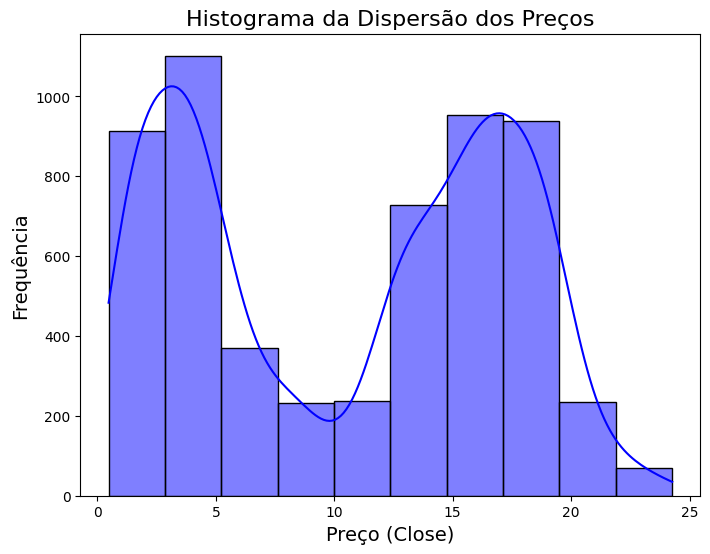

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Criando o histograma com seaborn
plt.figure(figsize=(8, 6))
sns.histplot(Ambev['Close'], bins=10, kde=True, color='blue')
plt.title('Histograma da Dispersão dos Preços', fontsize=16)
plt.xlabel('Preço (Close)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()


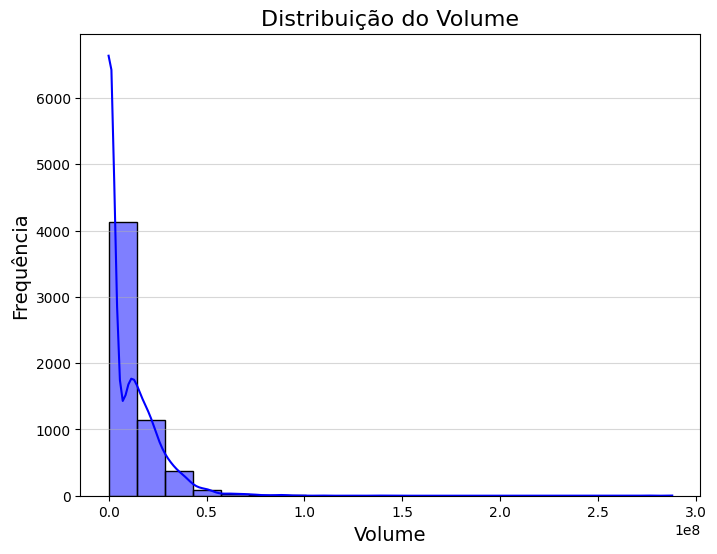

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(Ambev['Volume'], bins=20, kde=True, color='blue')
plt.title('Distribuição do Volume', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.show()


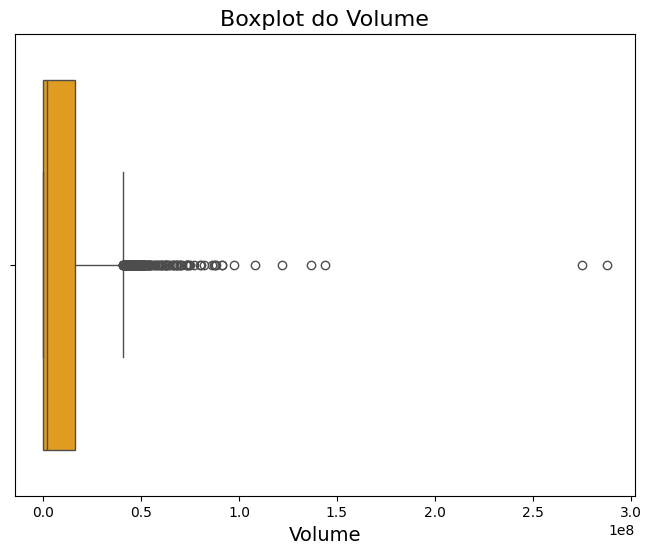

In [151]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Ambev, x='Volume', color='orange')
plt.title('Boxplot do Volume', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.show()


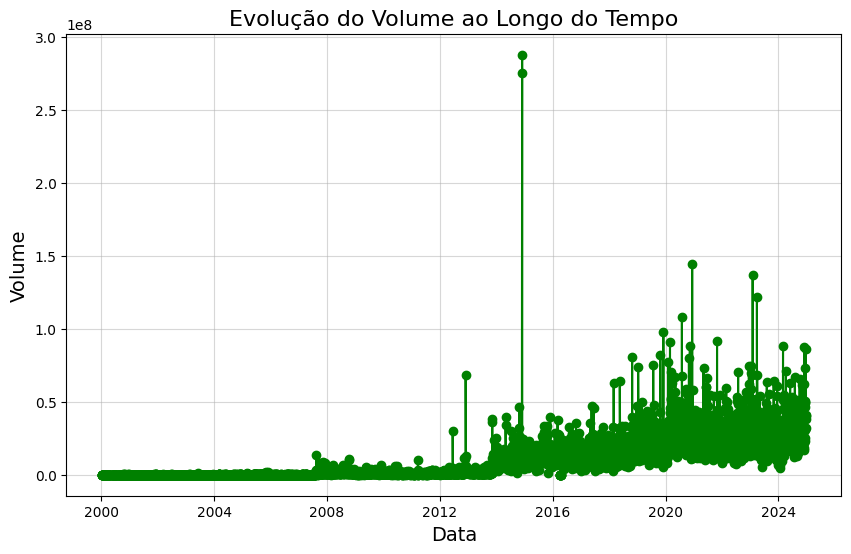

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(Ambev['Date'], Ambev['Volume'], color='green', linestyle='-', marker='o')
plt.title('Evolução do Volume ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(alpha=0.5)
plt.show()


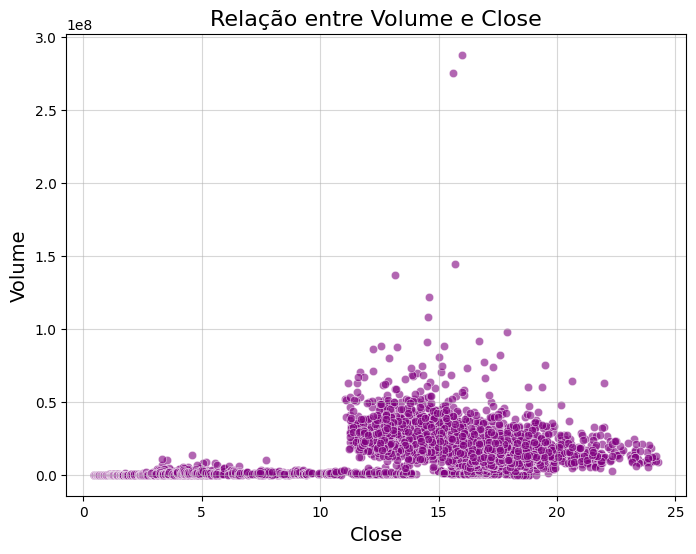

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Ambev, x='Close', y='Volume', color='purple', alpha=0.6)
plt.title('Relação entre Volume e Close', fontsize=16)
plt.xlabel('Close', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(alpha=0.5)
plt.show()


In [154]:
Ambev['Volume'].describe()

count         5,779
mean      9,922,696
std      14,217,905
min              60
25%         144,768
50%       2,099,952
75%      16,354,750
max     287,695,249
Name: Volume, dtype: float64

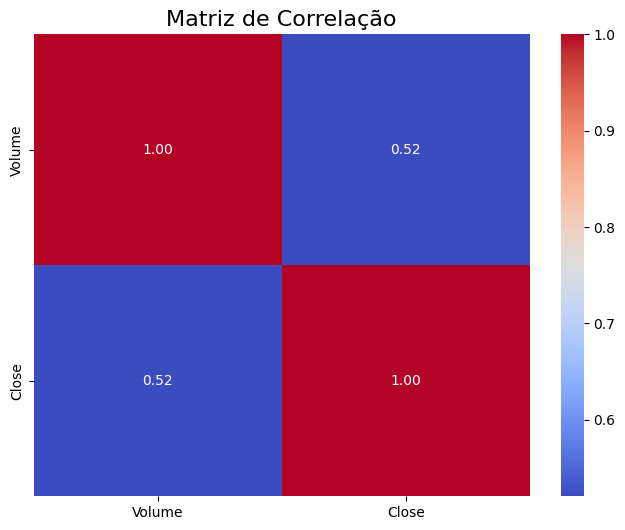

In [155]:
corr_matrix = Ambev[['Volume', 'Close']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação', fontsize=16)
plt.show()


In [53]:
import pandas as pd

# Supondo que Ambev seja o seu DataFrame
# Exemplo de como contar as ocorrências de cada valor na coluna 'Volume'
value_counts = Ambev['Volume'].value_counts()

# Filtrando volumes que ocorrem mais de 3 vezes
volumes_mais_de_3 = value_counts[value_counts > 3].index

# Criando a máscara booleana
mascara = Ambev['Volume'].isin(volumes_mais_de_3)

Ambev[mascara].head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
1,2000-01-06,0,0,0,0,0,227,ABEV3.SA
2,2000-01-07,0,0,0,0,0,151,ABEV3.SA
3,2000-01-10,0,0,0,0,0,1516,ABEV3.SA
4,2000-01-11,0,0,0,0,0,3791,ABEV3.SA
6,2000-01-13,0,0,0,0,0,606,ABEV3.SA


In [69]:
import pandas as pd

# Supondo que Ambev seja o seu DataFrame
# Certifique-se de que a coluna 'Date' esteja no formato datetime
Ambev['Date'] = pd.to_datetime(Ambev['Date'])

# 1. Ordenar o DataFrame por 'Date'
Ambev = Ambev.sort_values(by='Date')

# 2. Criar uma máscara para verificar volumes repetidos em intervalos de 5 dias
mask_5_days = pd.Series(False, index=Ambev.index)  # Inicializa uma máscara com False

# 3. Iterar sobre o DataFrame para verificar volumes repetidos a cada 5 dias
for i in range(len(Ambev) - 5):  # Verifica até 5 dias antes do final do DataFrame
    if Ambev['Volume'].iloc[i] == Ambev['Volume'].iloc[i + 5]:
        # Se houver repetição do volume a cada 5 dias, marcar as linhas envolvidas
        mask_5_days.iloc[i] = True
        mask_5_days.iloc[i + 5] = True

# 4. Filtrar e salvar todos os volumes repetidos na máscara
Ambev['mask'] = mask_5_days

# 5. Contar o número de volumes repetidos a cada 5 dias
count_repeated = Ambev['mask'].sum()  # Conta os valores True na máscara

# Exibir a quantidade de repetidos
print(f"Quantidade de volumes repetidos a cada 5 dias: {count_repeated}")

# Exibir as linhas que atendem a essa condição
print(Ambev[Ambev['mask']])


Quantidade de volumes repetidos a cada 5 dias: 29
           Date  Open  High  Low  Close  Adj Close  Volume    Ticker  mask
70   2000-04-12     1     1    1      1          0     227  ABEV3.SA  True
76   2000-04-20     1     1    1      1          0     227  ABEV3.SA  True
82   2000-04-28     1     1    1      1          0      75  ABEV3.SA  True
89   2000-05-09     1     1    1      1          0      75  ABEV3.SA  True
90   2000-05-10     1     1    1      1          0      75  ABEV3.SA  True
93   2000-05-15     1     1    1      1          0      75  ABEV3.SA  True
100  2000-05-24     1     1    1      1          0      75  ABEV3.SA  True
103  2000-05-29     1     1    1      1          0      75  ABEV3.SA  True
137  2000-07-14     1     1    1      1          0      75  ABEV3.SA  True
147  2000-07-28     1     1    1      1          0      75  ABEV3.SA  True
426  2001-08-23     2     2    2      2          1     455  ABEV3.SA  True
431  2001-08-30     1     1    1      1          1

In [127]:
import pandas as pd

# Supondo que Ambev seja o seu DataFrame
# Certifique-se de que a coluna 'Date' esteja no formato datetime
Ambev['Date'] = pd.to_datetime(Ambev['Date'])

# 1. Ordenar o DataFrame por 'Date'
Ambev = Ambev.sort_values(by='Date')

# 2. Criar uma máscara para verificar volumes repetidos em intervalos de 3 dias
mask_3_days = pd.Series(False, index=Ambev.index)  # Inicializa uma máscara com False

# 3. Iterar sobre o DataFrame para verificar volumes repetidos a cada 3 dias
for i in range(len(Ambev) - 3):  # Verifica até 3 dias antes do final do DataFrame
    if Ambev['Close'].iloc[i] == Ambev['Close'].iloc[i + 3]:
        # Se houver repetição do volume a cada 3 dias, marcar as linhas envolvidas
        mask_3_days.iloc[i] = True
        mask_3_days.iloc[i + 3] = True

# 4. Filtrar e salvar todos os volumes repetidos na máscara
Ambev['mask'] = mask_3_days

# 5. Contar o número de volumes repetidos a cada 3 dias
count_repeated = Ambev['mask'].sum()  # Conta os valores True na máscara

# Exibir a quantidade de repetidos
print(f"Quantidade de volumes repetidos a cada 3 dias: {count_repeated}")

Ambev[Ambev['mask']].head()


Quantidade de volumes repetidos a cada 3 dias: 266


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,mask
1,2000-01-06,0,0,0,0,0,227,ABEV3.SA,True
4,2000-01-11,0,0,0,0,0,3791,ABEV3.SA,True
7,2000-01-14,0,0,0,0,0,6445,ABEV3.SA,True
72,2000-04-14,1,1,1,1,0,1895,ABEV3.SA,True
73,2000-04-17,1,1,1,1,0,303,ABEV3.SA,True


In [68]:
Ambev[Ambev['mask']].to_excel("C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Ambev_repetidos.xlsx", index=False)

##### Carregar

In [7]:
all_data = pd.read_csv('C:/Users/Samsung/Documents/GitHub-Datas/TCC_Machine_Learning/Dados_bolsa_interpolar.csv')
all_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2000-01-05,0.520882,0.520882,0.520882,0.520882,0.294043,985,ABEV3.SA
1,2000-01-06,0.494478,0.494478,0.494478,0.494478,0.279138,227,ABEV3.SA
2,2000-01-07,0.494478,0.494478,0.494478,0.494478,0.279138,151,ABEV3.SA
3,2000-01-10,0.494478,0.494478,0.494478,0.494478,0.279138,1516,ABEV3.SA
4,2000-01-11,0.494478,0.494478,0.494478,0.494478,0.279138,3791,ABEV3.SA


In [9]:
all_data[all_data['Ticker'] == 'SBSP3.SA'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6269 entries, 6267 to 12535
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6269 non-null   datetime64[ns]
 1   Open       6269 non-null   float64       
 2   High       6269 non-null   float64       
 3   Low        6269 non-null   float64       
 4   Close      6269 non-null   float64       
 5   Adj Close  6269 non-null   float64       
 6   Volume     6269 non-null   int64         
 7   Ticker     6269 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 440.8+ KB


In [12]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

import datetime as dt

one_year_ago = dt.datetime.now() - pd.DateOffset(years=1)

# Filtrar os dados apenas para o período do último 1 ano
all_data_last_year = all_data[all_data['Date'] >= one_year_ago]

# Calcular o volume acumulado por 'Ticker'
volume_acumulado = all_data_last_year.groupby('Ticker')['Volume'].sum().reset_index()

# Ordenar do maior para o menor volume acumulado
volume_acumulado = volume_acumulado.sort_values(by='Volume', ascending=False)

volume_acumulado.head(10)

,Ticker,Volume
37,BBDC4.SA,9554568400
386,PETR4.SA,9231833600
3,ABEV3.SA,7143969100
287,ITUB4.SA,5835474400
508,VALE3.SA,5761464700
285,ITSA4.SA,5743721660
336,MGLU3.SA,4903106541
156,CVCB3.SA,4796487400
316,LREN3.SA,4612975140
35,BBAS3.SA,4282662200


In [8]:
import pandas as pd
import datetime as dt

# Garantir que a coluna 'Date' está no formato datetime
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Definir a data de 1 ano atrás em relação a hoje
one_year_ago = dt.datetime.now() - pd.DateOffset(years=1)

# Filtrar os dados apenas para o período do último 1 ano
all_data_last_year = all_data[all_data['Date'] >= one_year_ago]

# Calcular o número de dias negociados por Ticker no período de 1 ano
dias_negociados = all_data_last_year.groupby('Ticker')['Date'].nunique().reset_index()
dias_negociados.rename(columns={'Date': 'Dias_Negociados'}, inplace=True)

# Calcular o volume total negociado por Ticker
volume_total = all_data_last_year.groupby('Ticker')['Volume'].sum().reset_index()
volume_total.rename(columns={'Volume': 'Volume_Total'}, inplace=True)

# Combinar os dois DataFrames
volume_data = pd.merge(volume_total, dias_negociados, on='Ticker')

# Calcular o volume médio diário por Ticker
volume_data['Volume_Medio'] = volume_data['Volume_Total'] / volume_data['Dias_Negociados']

# Ordenar do maior para o menor volume médio
volume_data = volume_data.sort_values(by='Volume_Medio', ascending=False)

# Exibir as 10 ações mais líquidas
top_10_liquidez = volume_data.head(10)
print(top_10_liquidez)


       Ticker  Volume_Total  Dias_Negociados  Volume_Medio
37   BBDC4.SA    9486035800              250  3.794414e+07
386  PETR4.SA    9187359300              250  3.674944e+07
3    ABEV3.SA    7119606000              250  2.847842e+07
287  ITUB4.SA    5807652700              250  2.323061e+07
508  VALE3.SA    5745131300              250  2.298053e+07
285  ITSA4.SA    5715793865              250  2.286318e+07
336  MGLU3.SA    4889812989              250  1.955925e+07
156  CVCB3.SA    4786378500              250  1.914551e+07
316  LREN3.SA    4601315030              250  1.840526e+07
35   BBAS3.SA    4267144000              250  1.706858e+07
